In [1]:
import pandas as pd
import numpy as np
from utils import reduce_memory_usage
from utils import break_datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Loading data

In [3]:
train = pd.read_csv('/Users/goksuuzunturk/Desktop/DI 502 Project/FilteredDataset/train.csv').drop('Unnamed: 0',axis=1)
test =  pd.read_csv('/Users/goksuuzunturk/Desktop/DI 502 Project/FilteredDataset/test.csv').drop('Unnamed: 0',axis=1)

In [4]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,46,0,2016-01-01 00:00:00,53.2397,0,Retail,9045,2016.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,74,0,2016-01-01 00:00:00,43.0013,0,Parking,387638,1997.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,93,0,2016-01-01 00:00:00,52.4206,0,Office,33370,1982.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,105,0,2016-01-01 00:00:00,23.3036,1,Education,50623,NaN,5.0,3.8,NaN,2.4,NaN,1021.0,240.0,3.1
4,106,0,2016-01-01 00:00:00,0.3746,1,Education,5374,NaN,4.0,3.8,NaN,2.4,NaN,1021.0,240.0,3.1


# Saving some memory

In [4]:
reduce_memory_usage(train)
reduce_memory_usage(test)
train.info()

Mem. usage decreased to 505.84 Mb (64.1% reduction)
Mem. usage decreased to 1086.01 Mb (64.1% reduction)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530741 entries, 0 to 11530740
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   building_id         int16  
 1   meter               int8   
 2   timestamp           object 
 3   meter_reading       float32
 4   site_id             int8   
 5   primary_use         object 
 6   square_feet         int32  
 7   year_built          float16
 8   floor_count         float16
 9   air_temperature     float16
 10  cloud_coverage      float16
 11  dew_temperature     float16
 12  precip_depth_1_hr   float16
 13  sea_level_pressure  float16
 14  wind_direction      float16
 15  wind_speed          float16
dtypes: float16(9), float32(1), int16(1), int32(1), int8(2), object(2)
memory usage: 505.8+ MB


# Amount of data and nans

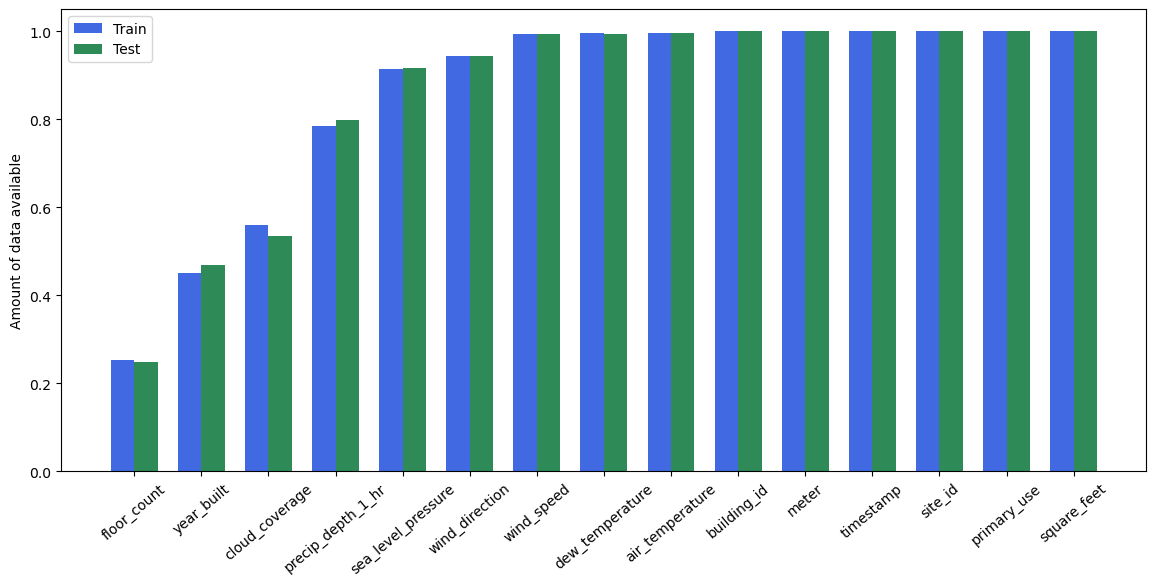

In [6]:
train_data = (train.count() / len(train)).drop('meter_reading').sort_values().values
ind = np.arange(len(train_data))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
tr = axes.bar(ind, train_data, width, color='royalblue')

test_data = (test.count() / len(test)).drop('row_id').sort_values().values
tt = axes.bar(ind+width, test_data, width, color='seagreen')

axes.set_ylabel('Amount of data available');
axes.set_xticks(ind + width / 2)
axes.set_xticklabels((train.count() / len(train)).drop('meter_reading').sort_values().index, rotation=40)
axes.legend([tr, tt], ['Train', 'Test']);

# Analyze Target Variable

In [7]:
train['meter_reading'].describe()

count    1.153074e+07
mean     1.786801e+02
std      3.770031e+02
min      2.000000e-04
25%      2.335000e+01
50%      6.861000e+01
75%      1.780000e+02
max      7.976900e+04
Name: meter_reading, dtype: float64

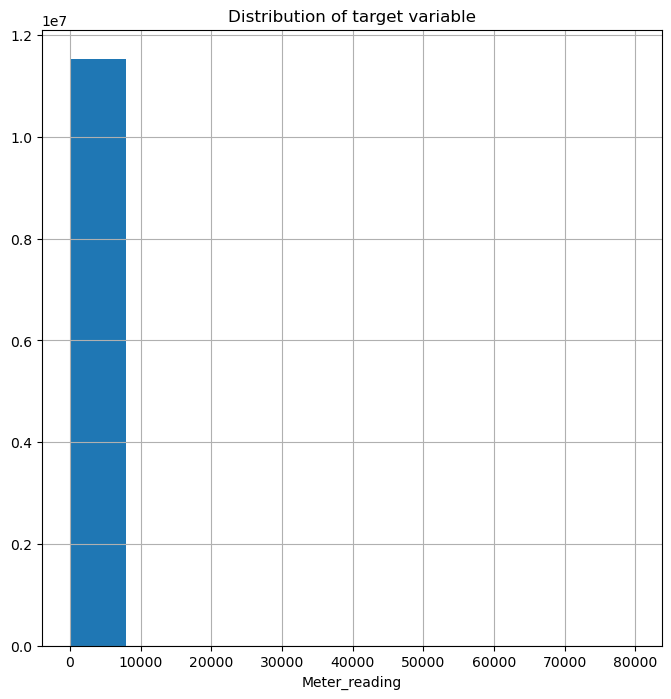

In [8]:
plt.figure(figsize=(8,8))
train['meter_reading'].hist()
plt.xlabel("Meter_reading")
plt.title("Distribution of target variable")
plt.show()

As we can see our target variable heavily skewed and not much of insights can be gathered from the above plot. Hence use log transformation.

In [4]:
train['log_meter_reading']=np.log1p(train['meter_reading'])
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,log_meter_reading
0,46,0,2016-01-01 00:00:00,53.2397,0,Retail,9045,2016.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,3.993413
1,74,0,2016-01-01 00:00:00,43.0013,0,Parking,387638,1997.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,3.784219
2,93,0,2016-01-01 00:00:00,52.4206,0,Office,33370,1982.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,3.978196
3,105,0,2016-01-01 00:00:00,23.3036,1,Education,50623,NaN,5.0,3.8,NaN,2.4,NaN,1021.0,240.0,3.1,3.190624
4,106,0,2016-01-01 00:00:00,0.3746,1,Education,5374,NaN,4.0,3.8,NaN,2.4,NaN,1021.0,240.0,3.1,0.318163


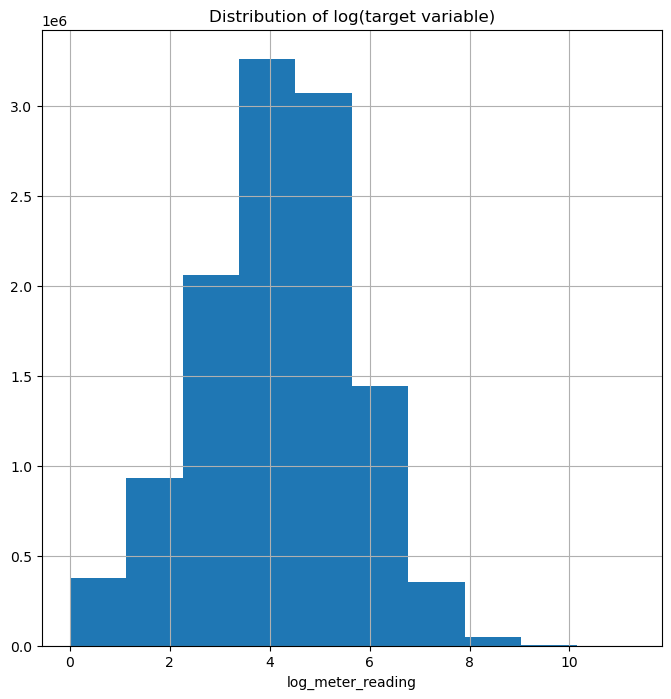

In [10]:
plt.figure(figsize=(8,8))
train['log_meter_reading'].hist()
plt.xlabel("log_meter_reading")
plt.title("Distribution of log(target variable)")
plt.show()

Now, the meter readings have a good variance after transformation

# Average Consumption by decompesed timestamps

In [5]:
train= break_datetime(train)
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,log_meter_reading,year,weekofyear,dayofweek,month,hour
0,46,0,2016-01-01,53.2397,0,Retail,9045,2016.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,3.993413,2015,53,5,1,0
1,74,0,2016-01-01,43.0013,0,Parking,387638,1997.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,3.784219,2015,53,5,1,0
2,93,0,2016-01-01,52.4206,0,Office,33370,1982.0,NaN,25.0,...,NaN,1019.5,0.0,0.0,3.978196,2015,53,5,1,0
3,105,0,2016-01-01,23.3036,1,Education,50623,NaN,5.0,3.8,...,NaN,1021.0,240.0,3.1,3.190624,2015,53,5,1,0
4,106,0,2016-01-01,0.3746,1,Education,5374,NaN,4.0,3.8,...,NaN,1021.0,240.0,3.1,0.318163,2015,53,5,1,0


### Average hourly reading

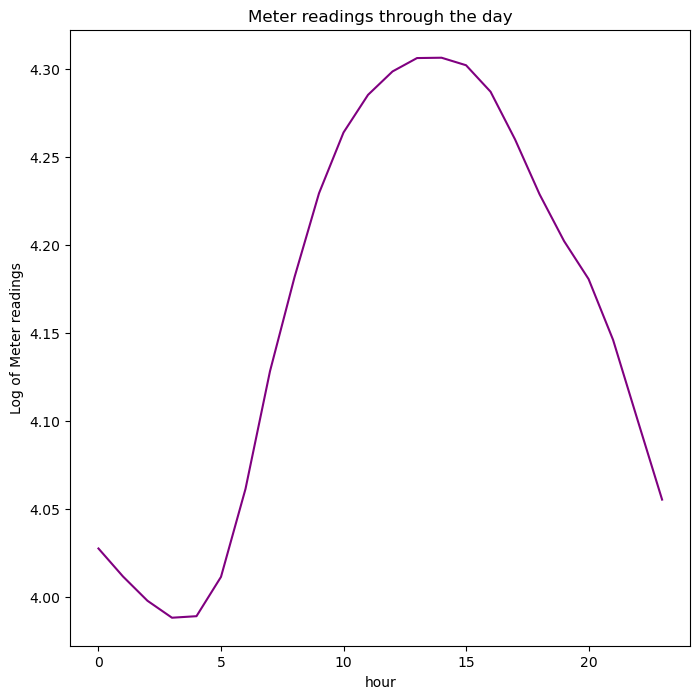

In [12]:
plt.figure(figsize=(8,8))
hour_df= train.groupby(['hour']).log_meter_reading.mean().reset_index()
sns.lineplot(x=hour_df['hour'], y=hour_df['log_meter_reading'], color='purple')
plt.ylabel("Log of Meter readings")
plt.title("Meter readings through the day")
plt.show()

It can be observerd from the above plot that the meter readings drop in the early hours of the morning around 4am and rises again after 6am. The hourly usage peaks in the afternoon arpund 3pm. This behaviour is obvious as most of institutes, industries and other buildings are fully operational during this time.

### Average daily reading

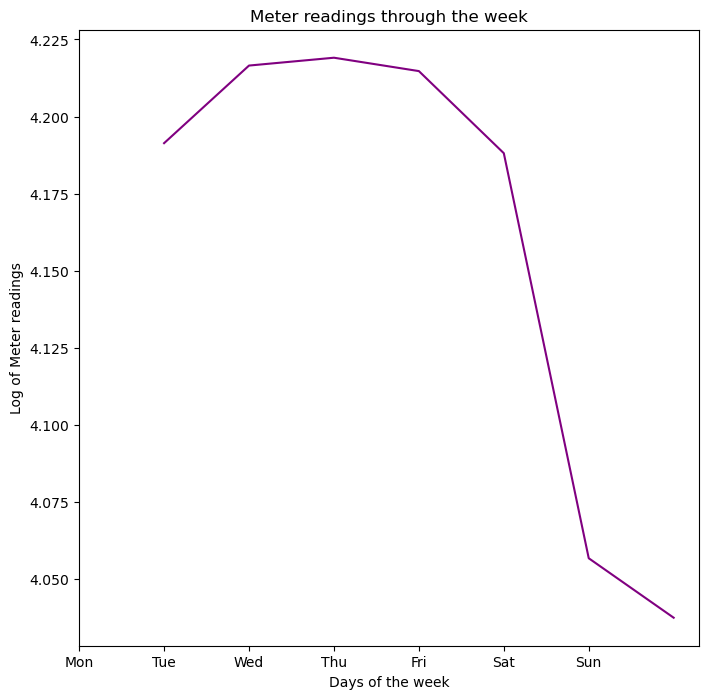

In [6]:
plt.figure(figsize=(8,8))
day_labels= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_df= train.groupby(['dayofweek']).log_meter_reading.mean().reset_index()
p = sns.lineplot(x=day_df['dayofweek'], y=day_df['log_meter_reading'], color='purple')
p.set_xticks(range(len(day_df['dayofweek']))) 
p.set_xticklabels(day_labels)
plt.xlabel('Days of the week')
plt.ylabel("Log of Meter readings")
plt.title("Meter readings through the week")
plt.show()

It can be observerd from the above plot that the meter readings drop at the weekends as we know most of the companies and educational institutions are closed at weekends

### Average monthly usage

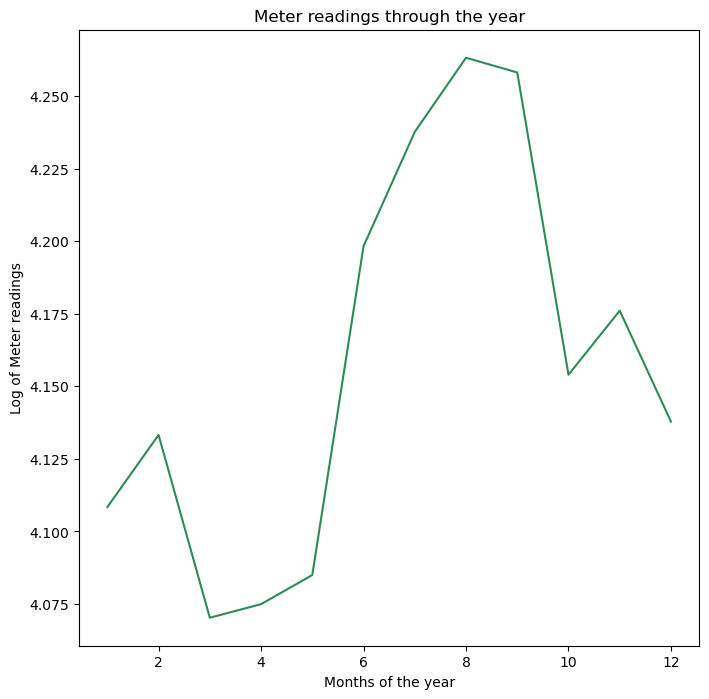

In [7]:
plt.figure(figsize=(8,8))
month_df= train.groupby(['month']).log_meter_reading.mean().reset_index()
sns.lineplot(x=month_df['month'], y=month_df['log_meter_reading'], color='seagreen')
plt.xlabel("Months of the year")
plt.ylabel("Log of Meter readings")
plt.title("Meter readings through the year")
plt.show()

The average monthly consumption is minimal in the initial months and then rises after April in the onset of spring. It peaks in August and starts dropping again in the Autumn and winter months.

### Average weekly usage

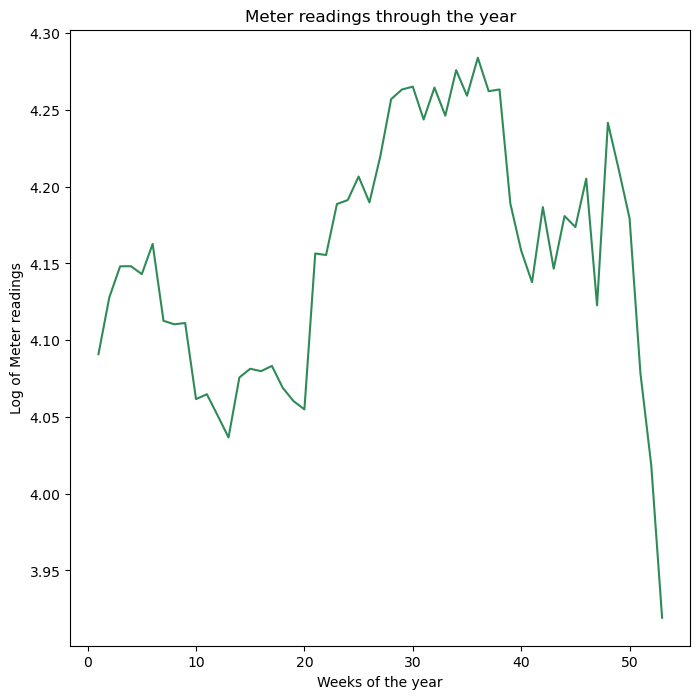

In [8]:
plt.figure(figsize=(8,8))
week_df= train.groupby(['weekofyear']).log_meter_reading.mean().reset_index()
sns.lineplot(x=week_df['weekofyear'], y=week_df['log_meter_reading'], color='seagreen')
plt.xlabel("Weeks of the year")
plt.ylabel("Log of Meter readings")
plt.title("Meter readings through the year")
plt.show()

# Average consumption by primary use

### Count plot of primary use

<Axes: xlabel='count', ylabel='primary_use'>

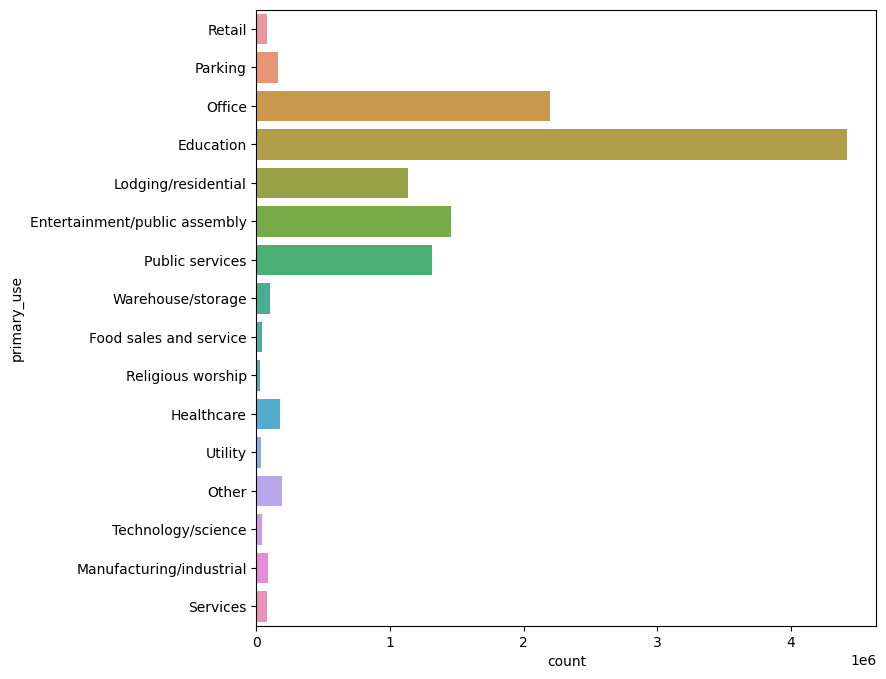

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(y='primary_use', data=train)

Most number of readings are present for educational institutes followed by office, enetertainment and Lodging/residential buildings.

### Average hourly consumption by primary use

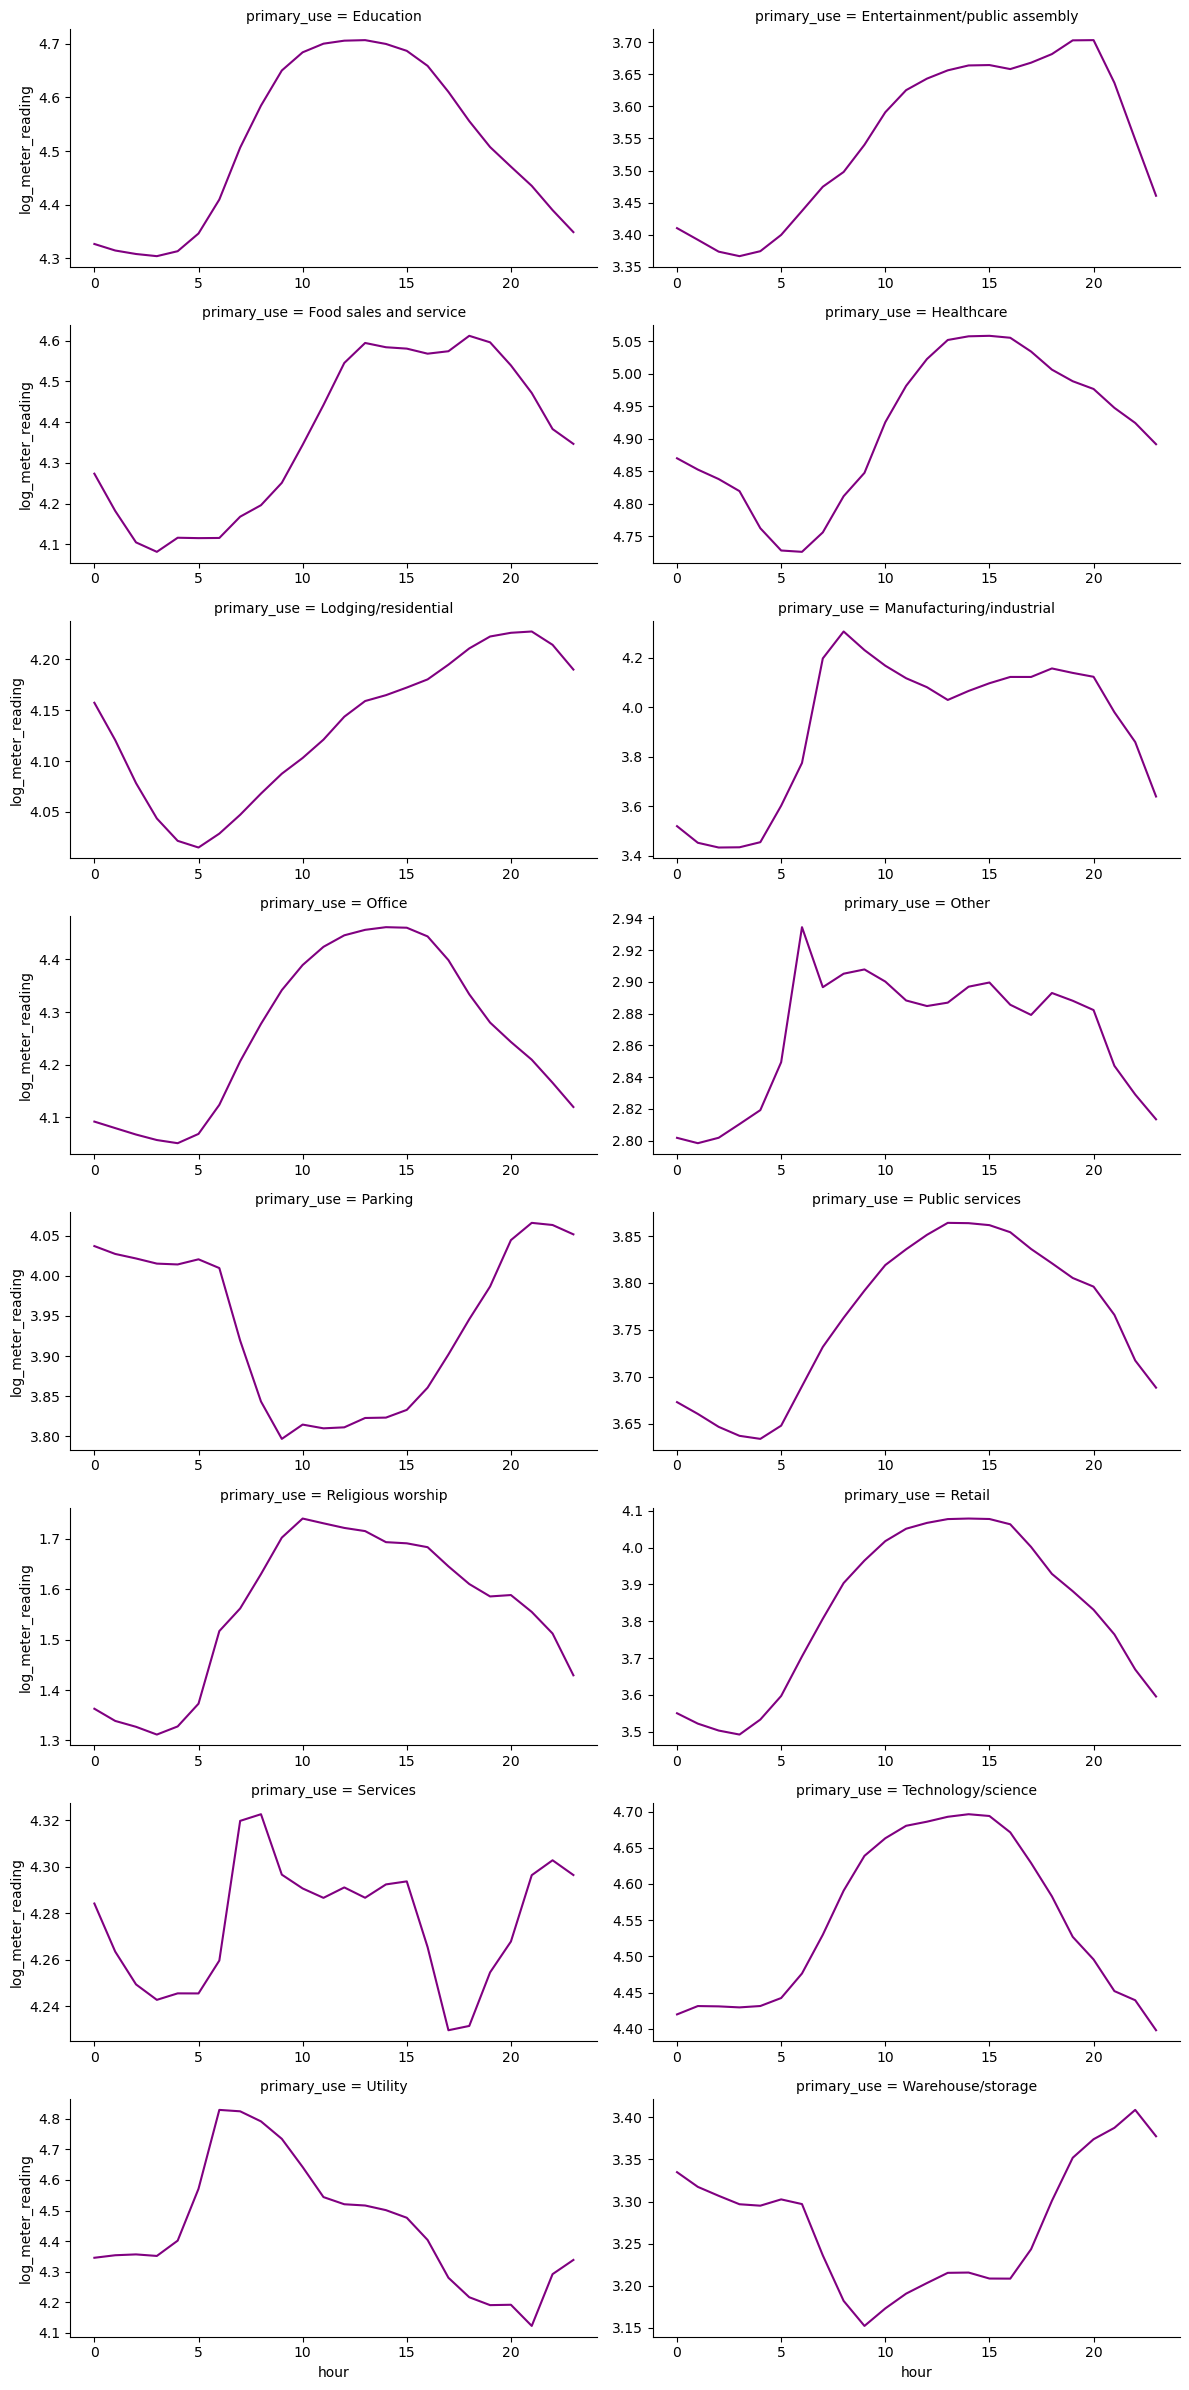

In [17]:
#Hourly average readings based on type of buildings
hour_use_df= train.groupby(['hour', 'primary_use']).log_meter_reading.mean().reset_index()
p=sns.FacetGrid(hour_use_df, col='primary_use', col_wrap=2, height=3, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'hour', 'log_meter_reading', color='purple')
plt.show()

In the above figure, we have plotted the average hourly usage for each of the primary usage category.

* The peak usage for educational institutes have the peak usage from morning 9 am until 3 pm and then the usage drops. This is explained as most educational institutes are operational during day time only.
* The consumption for entertainmet as well as food sales buildings rises after 10 and and continues to remain stable until 8 pm.
* The healthcare and residential buildings have a similar behaviour of usage as it peaks around 4 pm and then drops in the evening.
* The office buildings, retail, technology and public services buildings also consume most of the energy in the daytime mainly from 10 am to 4 pm.
* The parkings have the minimum usage in th morning hours and the consumption rises after 3 pm.
* The religious buildings consumes the least energy and utilities consume the most.

### Average daily consumption by primary use

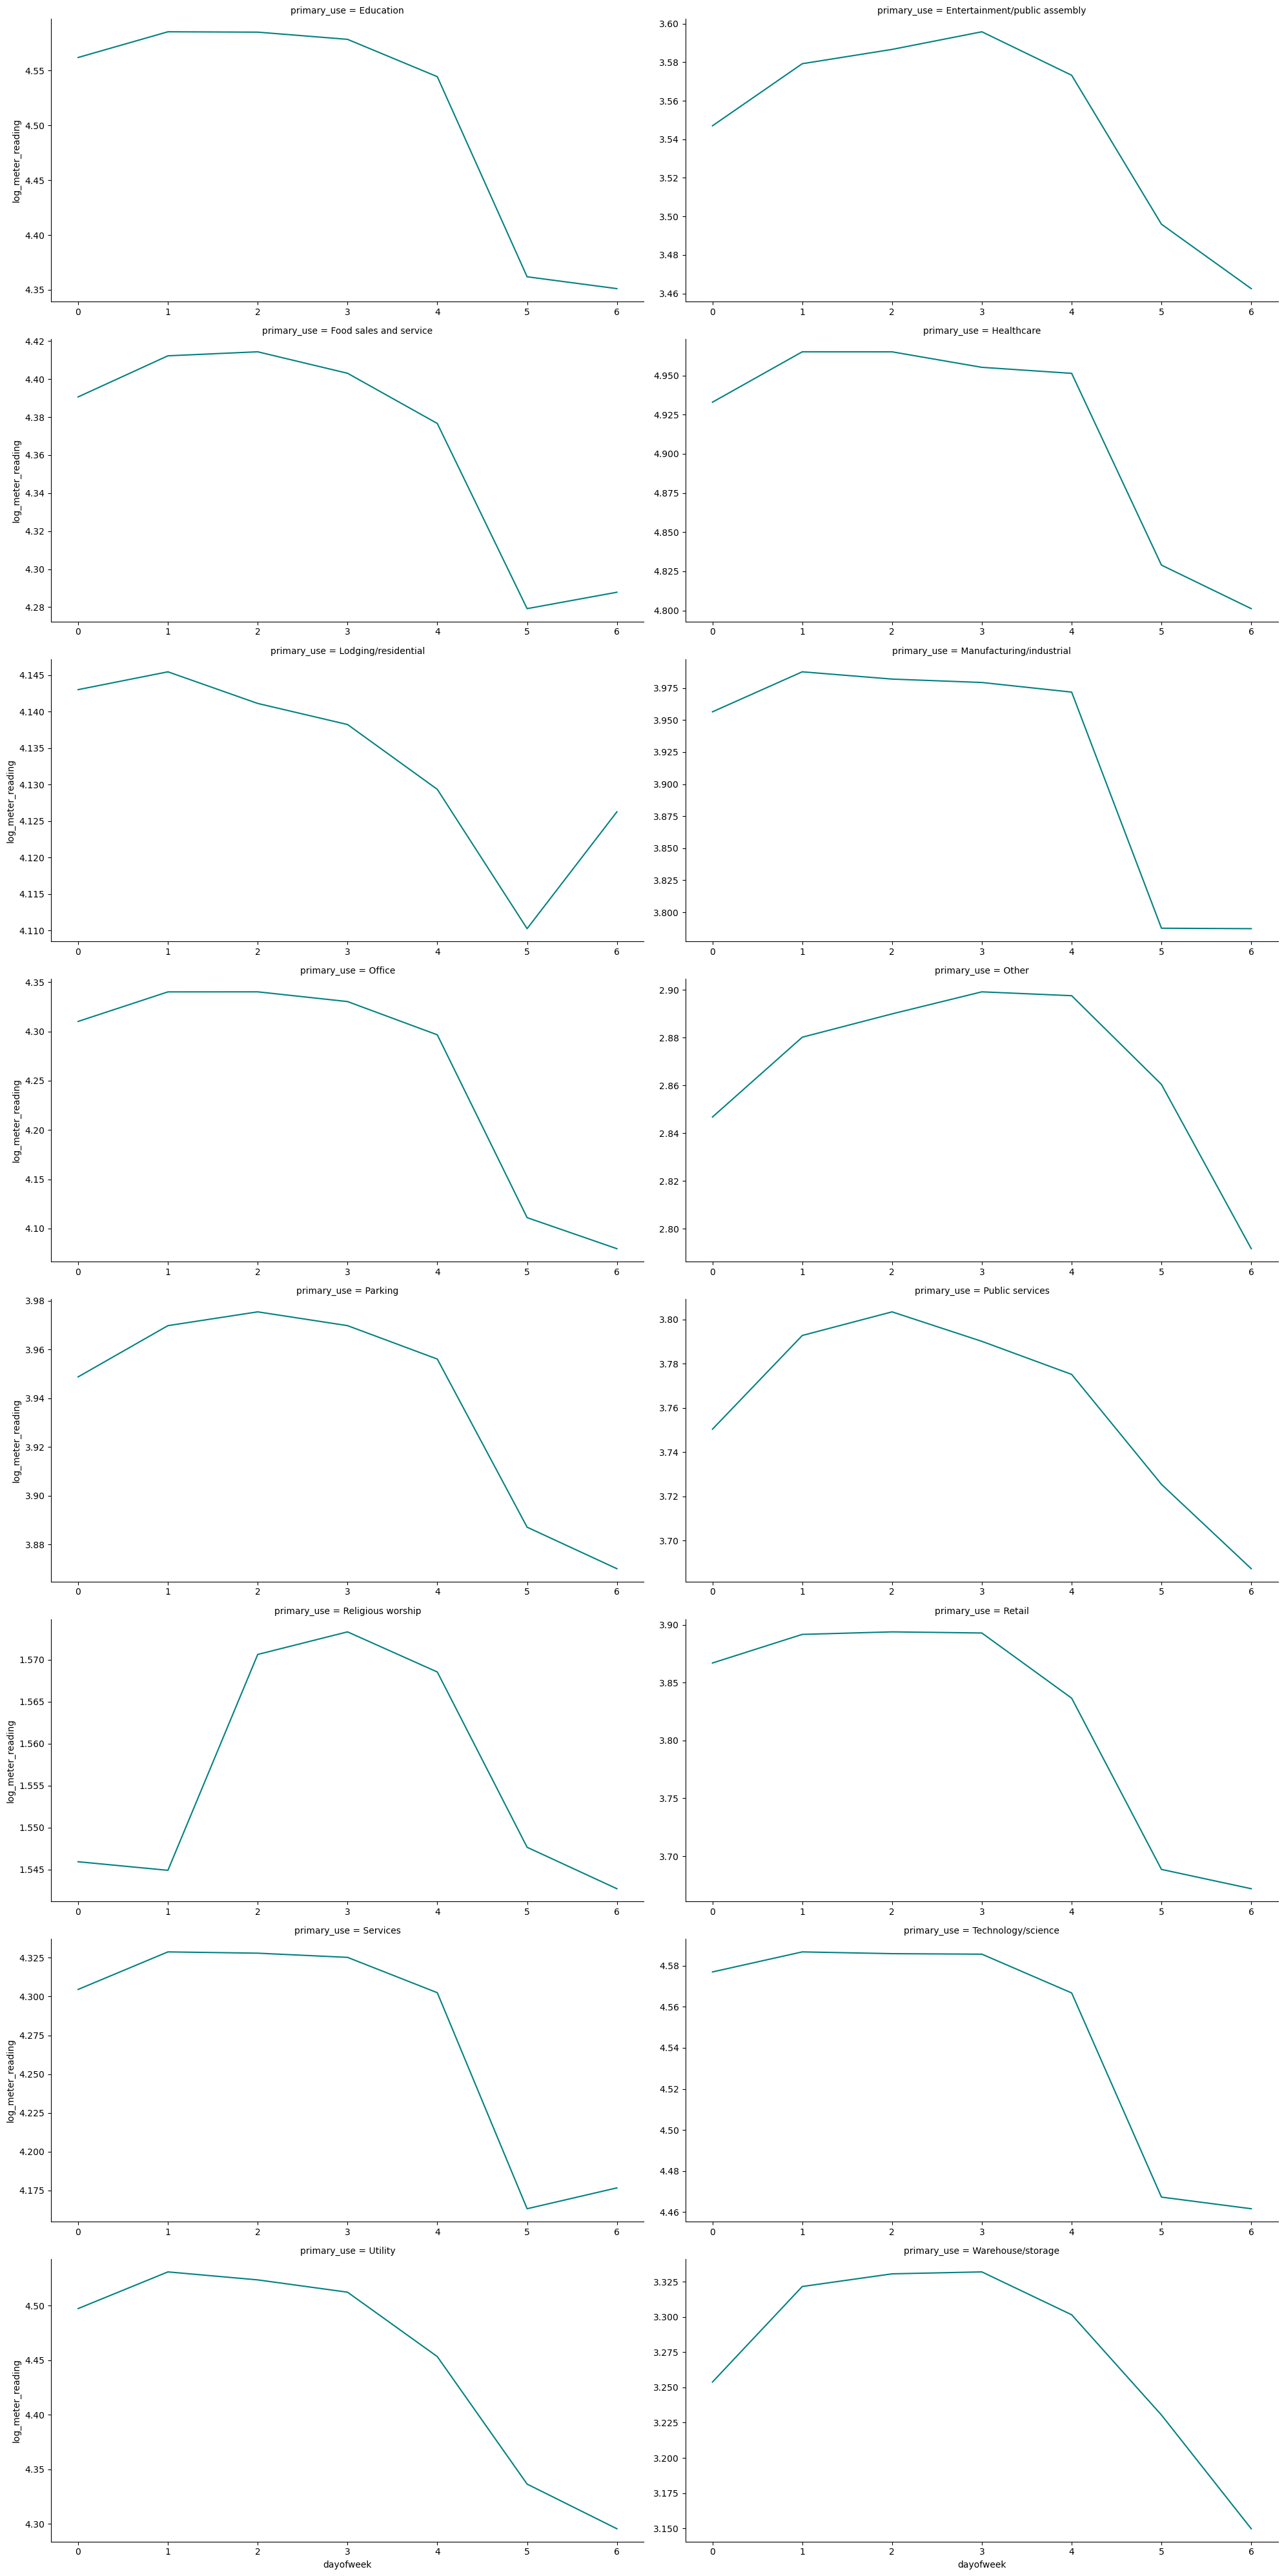

In [18]:
day_use_df= train.groupby(['dayofweek', 'primary_use']).log_meter_reading.mean().reset_index()
p=sns.FacetGrid(day_use_df, col='primary_use', col_wrap=2, height=5, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'dayofweek', 'log_meter_reading', color='teal')
plt.show()

In the above figure, we have plotted the average daily usage for each of the primary usage category. As we can see from the above plots, the average consumption is the lowest at weekends for all types of buildings

### Average monthly consumption by primary use

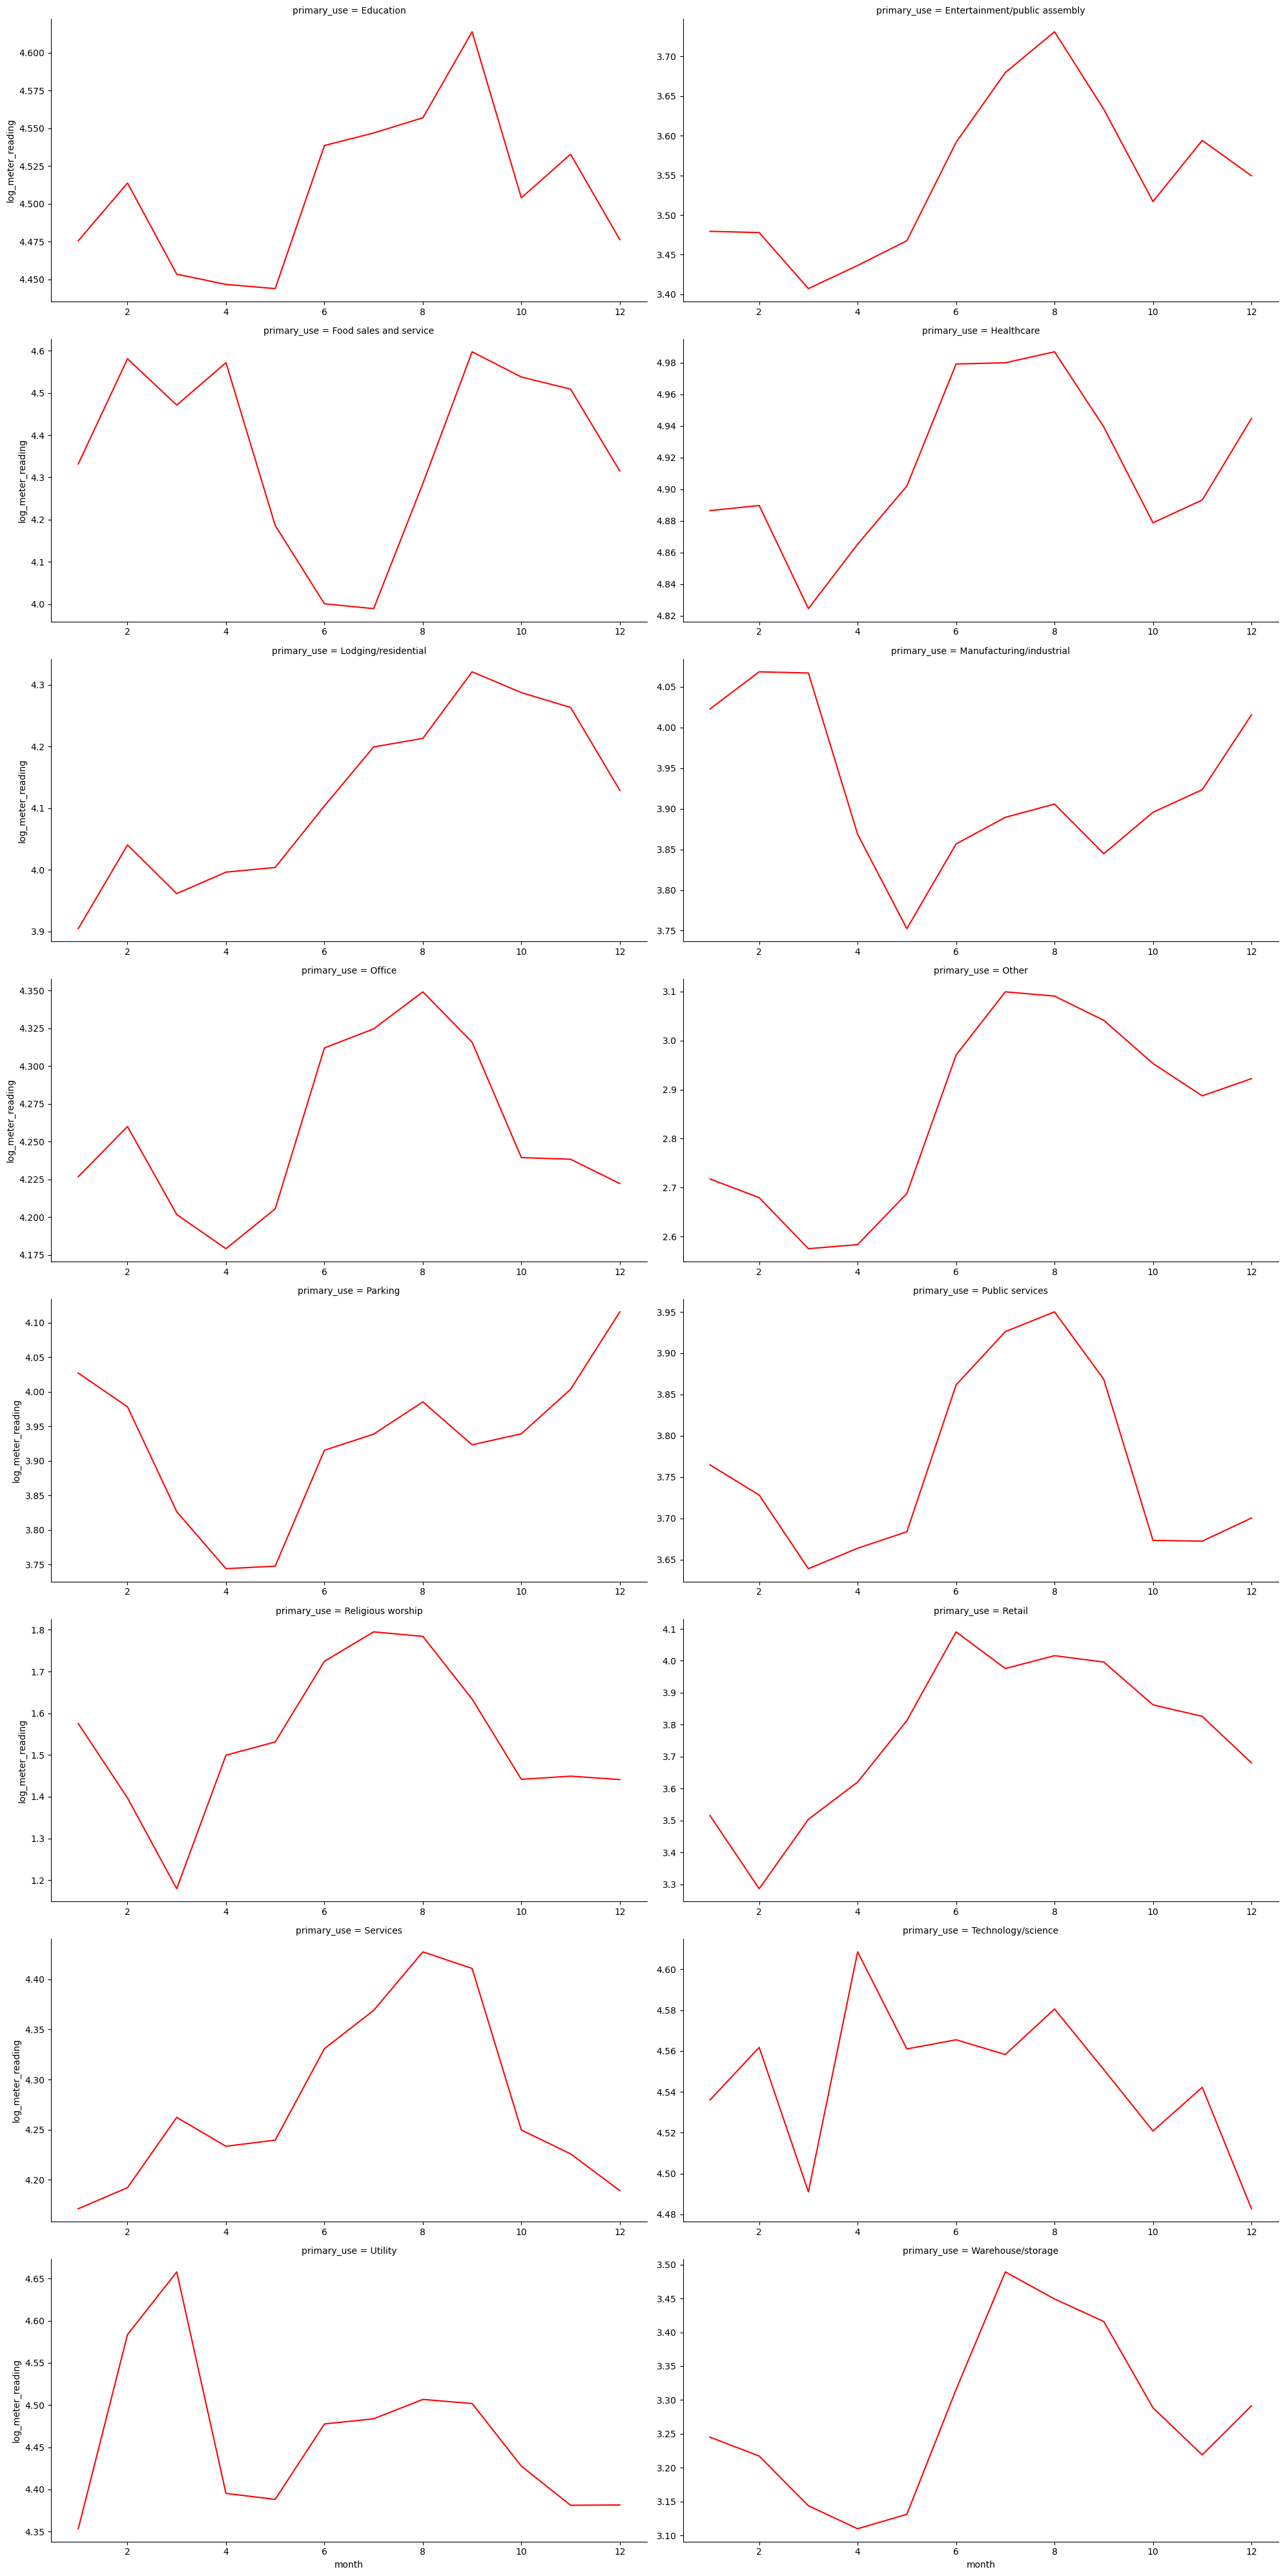

In [19]:
month_use_df= train.groupby(['month', 'primary_use']).log_meter_reading.mean().reset_index()
p=sns.FacetGrid(month_use_df, col='primary_use', col_wrap=2, height=5, aspect=2, sharey=False, sharex=False)
p.map(sns.lineplot, 'month', 'log_meter_reading', color='red')
plt.show()

In the above figure, we have plotted the average hourly usage for each of the primary usage category. Most of the instutions have higher consumptions in summertime except utilities, manufacturing.

# Average consumption by sitewise

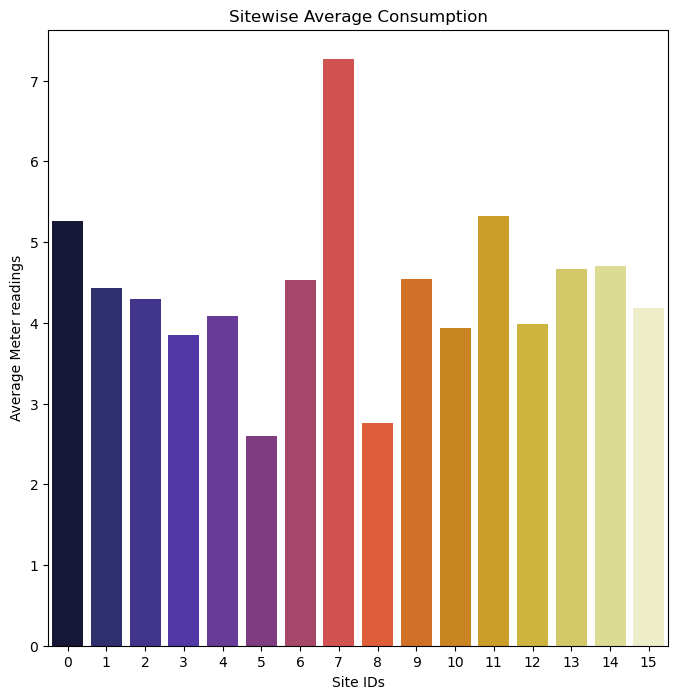

In [20]:
plt.figure(figsize=(8,8))
site_df= train.groupby(['site_id']).log_meter_reading.mean().reset_index()
sns.barplot(x=site_df['site_id'], y=site_df['log_meter_reading'], palette='CMRmap')
plt.ylabel("Average Meter readings")
plt.xlabel("Site IDs")
plt.title("Sitewise Average Consumption")
plt.show()

# Average Consumption by building charecteristics

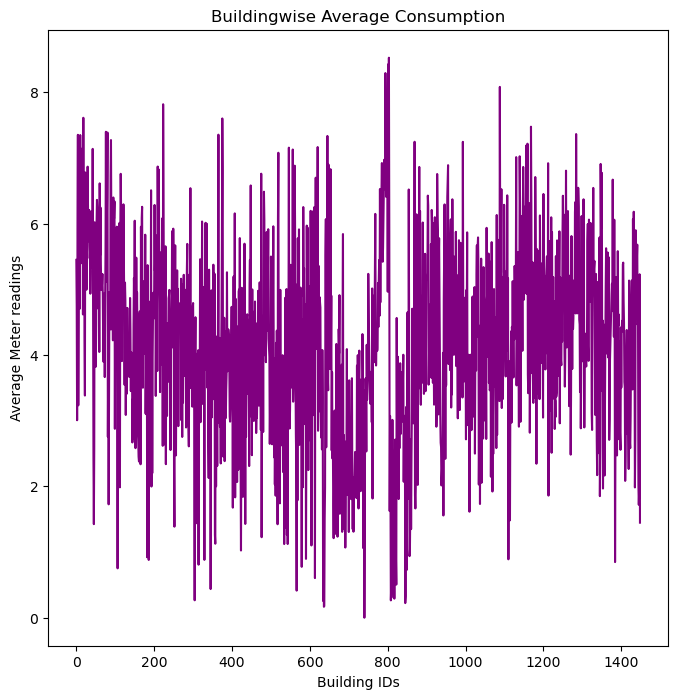

In [21]:
plt.figure(figsize=(8,8))
site_df= train.groupby(['building_id']).log_meter_reading.mean().reset_index()
sns.lineplot(x=site_df['building_id'], y=site_df['log_meter_reading'], color='purple')
plt.ylabel("Average Meter readings")
plt.xlabel("Building IDs")
plt.title("Buildingwise Average Consumption")
plt.show()

As we can see from the above plot, the meter readings vary accross the buildings.

### Distribution plot of square feet

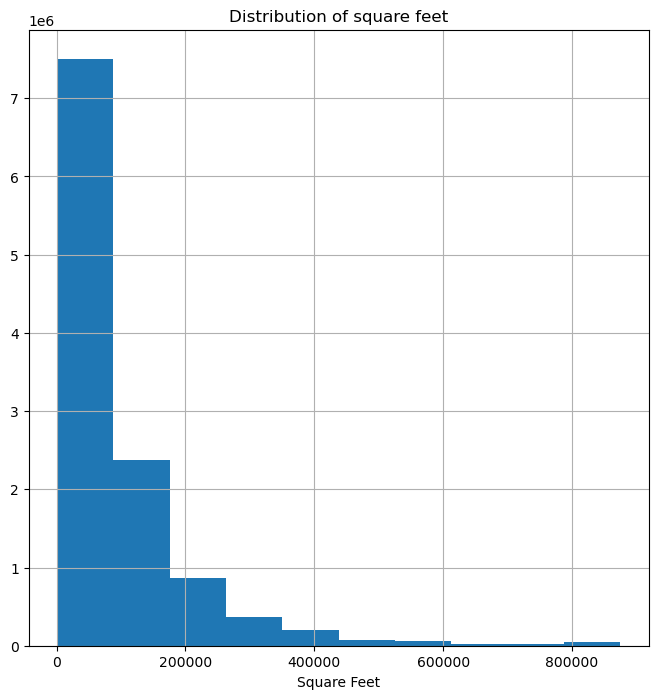

In [22]:
plt.figure(figsize=(8,8))
train['square_feet'].hist()
plt.xlabel("Square Feet")
plt.title("Distribution of square feet")
plt.show()

As the square feet is also heavily skewed and the scale of values is also very large hence we will apply a log transformation here and plot the distribution.

In [23]:
train['log_square_feet']=np.log1p(train['square_feet'])

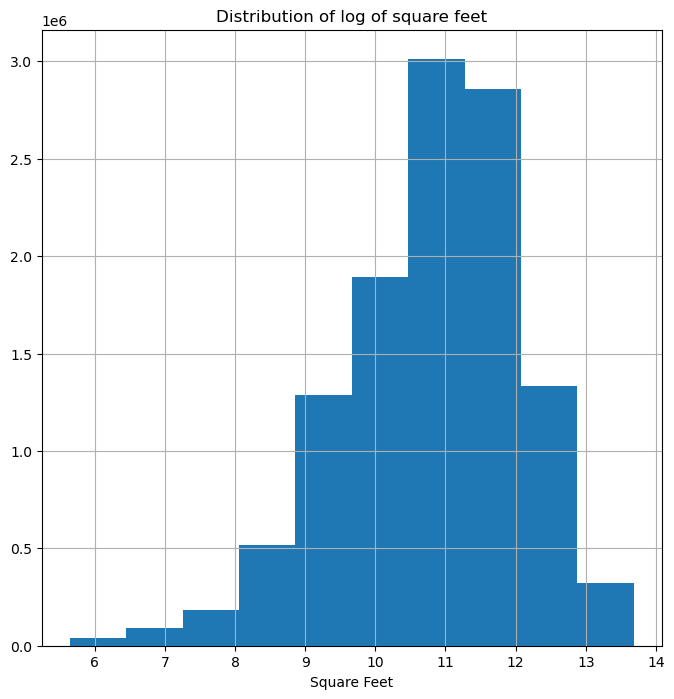

In [24]:
plt.figure(figsize=(8,8))
train['log_square_feet'].hist()
plt.xlabel("Square Feet")
plt.title("Distribution of log of square feet")
plt.show()

Now the distribution looks better after log transformations.

### Mean meter readings by square feet

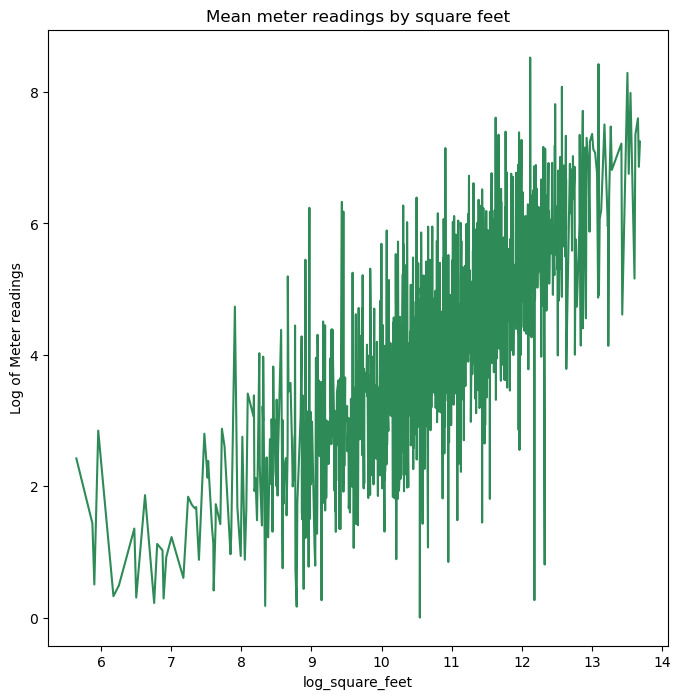

In [25]:
plt.figure(figsize=(8,8))
feet_df= train.groupby('log_square_feet').log_meter_reading.mean().reset_index()
sns.lineplot(x=feet_df['log_square_feet'], y=feet_df['log_meter_reading'], color='seagreen')
plt.ylabel("Log of Meter readings")
plt.title("Mean meter readings by square feet")
plt.show()

There is clear positive relation between the two. As the size of the building increases, the meter consumption also increases.

### Distribution plot of floor count

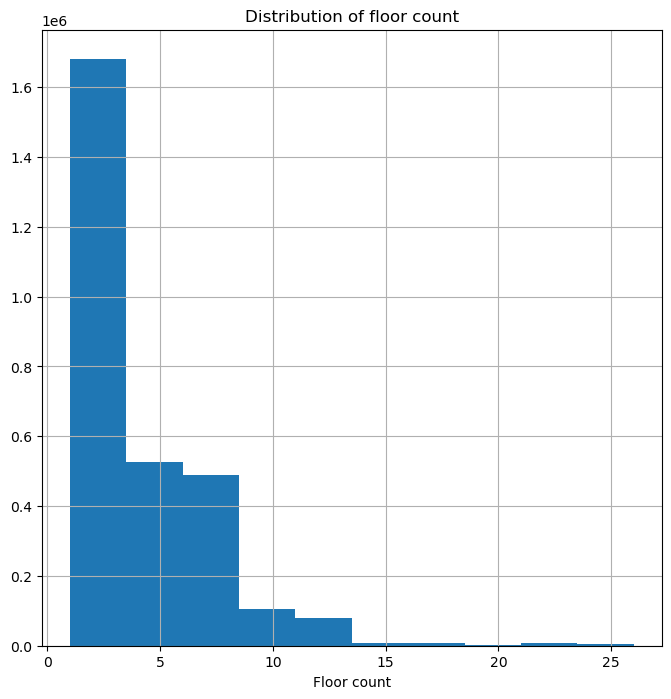

In [26]:
plt.figure(figsize=(8,8))
train['floor_count'].dropna().hist()
plt.xlabel("Floor count")
plt.title("Distribution of floor count")
plt.show()

Not much of the buildings have floors greater than 10. The maximum buildings have floors less than 5.

### Mean meter readings by floor count

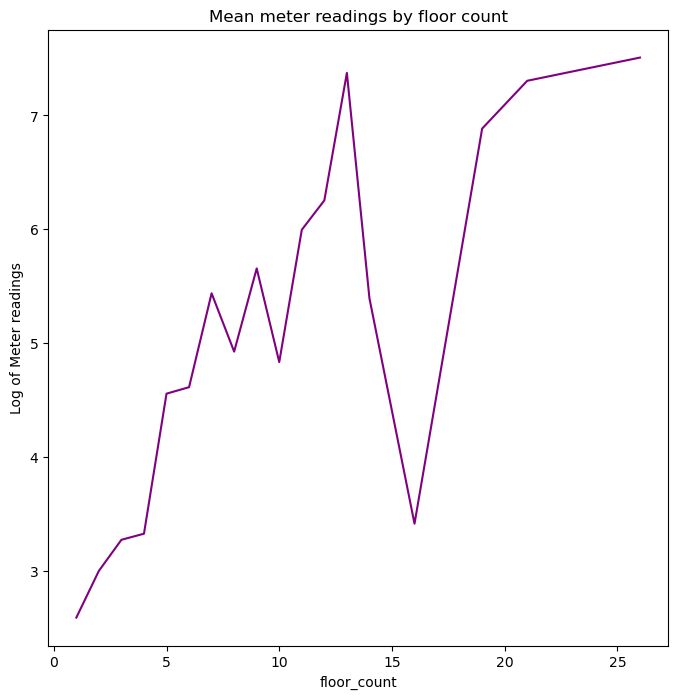

In [27]:
plt.figure(figsize=(8,8))
train['floor_count'] = train['floor_count'].astype('float32')
floor_df= train.groupby('floor_count').log_meter_reading.mean().reset_index()
sns.lineplot(x=floor_df['floor_count'], y=floor_df['log_meter_reading'], color='purple')
plt.ylabel("Log of Meter readings")
plt.title("Mean meter readings by floor count")
plt.show()

When the floor count is more than 10 the meter reading peaks and then drops and then peaks again. This might be due to several reasons like not all the floors are used at a time.

### Distribution plot of year built

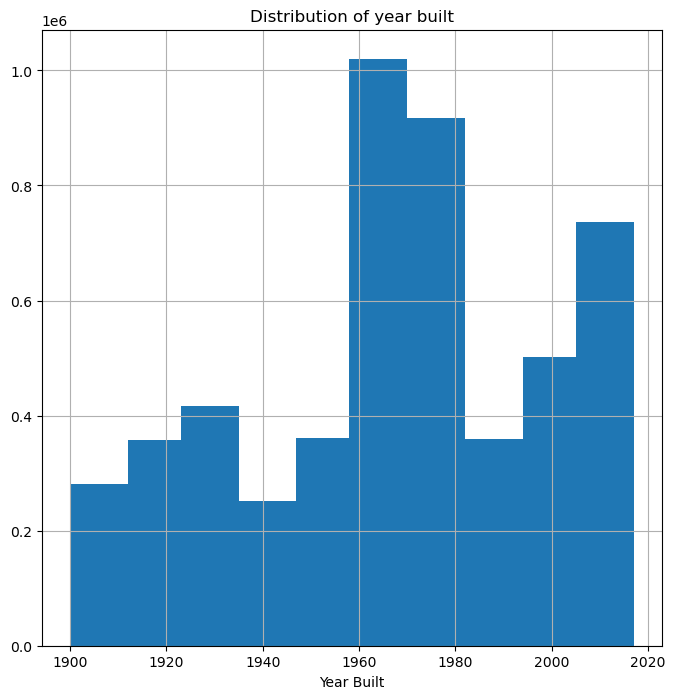

In [28]:
plt.figure(figsize=(8,8))
train['year_built'].dropna().hist()
plt.xlabel("Year Built")
plt.title("Distribution of year built")
plt.show()

The distribution is spread over a period of 120 years. Most of the buildings are built after 1960.

### Mean meter readings by year built

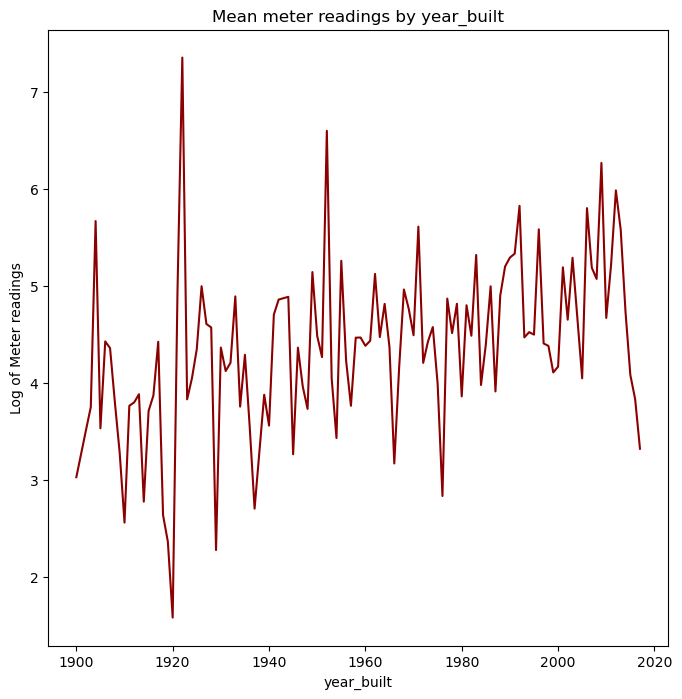

In [29]:
plt.figure(figsize=(8,8))
train['year_built'] = train['year_built'].astype('float32')
year_df= train.groupby('year_built').log_meter_reading.mean().reset_index()
sns.lineplot(x=year_df['year_built'], y=year_df['log_meter_reading'], color='darkred')
plt.ylabel("Log of Meter readings")
plt.title("Mean meter readings by year_built")
plt.show()

# Weather Analysis

### Distribution Plot: Air Temperature

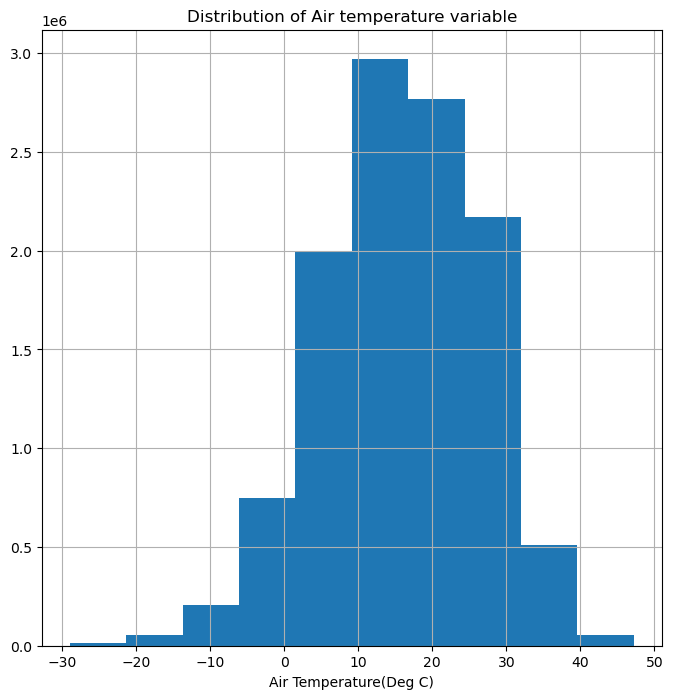

In [30]:
plt.figure(figsize=(8,8))
train['air_temperature'].dropna().hist()
plt.xlabel("Air Temperature(Deg C)")
plt.title("Distribution of Air temperature variable")
plt.show()

The air temperature roughly follows a normal distribution. The maximum observations lie between 0-30 deg C.

### Mean meter readings by air temperature

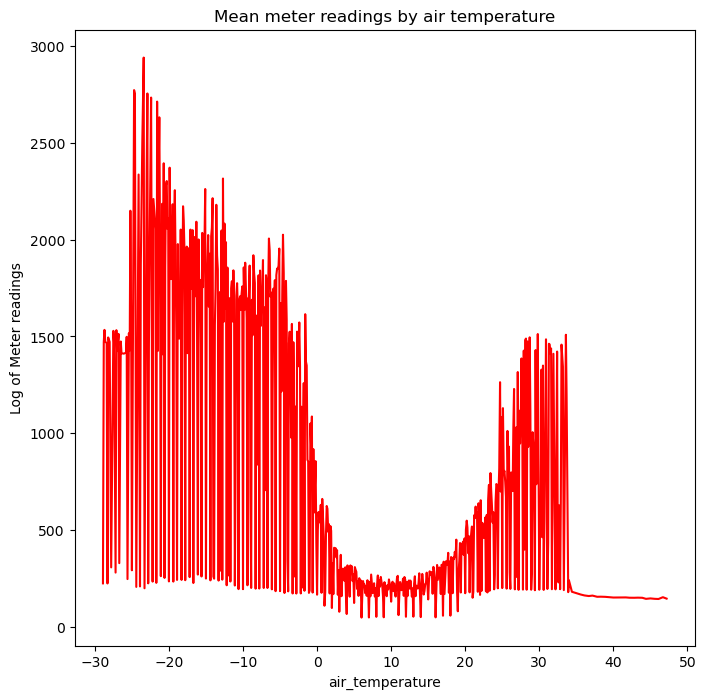

In [31]:
plt.figure(figsize=(8,8))
train['air_temperature'] = train['air_temperature'].astype('float32')
temp_df= train.groupby('air_temperature').meter_reading.mean().reset_index()
sns.lineplot(x=temp_df['air_temperature'], y=temp_df['meter_reading'], color='red')
plt.ylabel("Log of Meter readings")
plt.title("Mean meter readings by air temperature")
plt.show()

The average meter readings are high when the temperature is negative, once it starts increasing, the meter consumption reduces. It again increases when the temperature rises above 15 deg C

### Mean temperatures and mean electricity readings by site

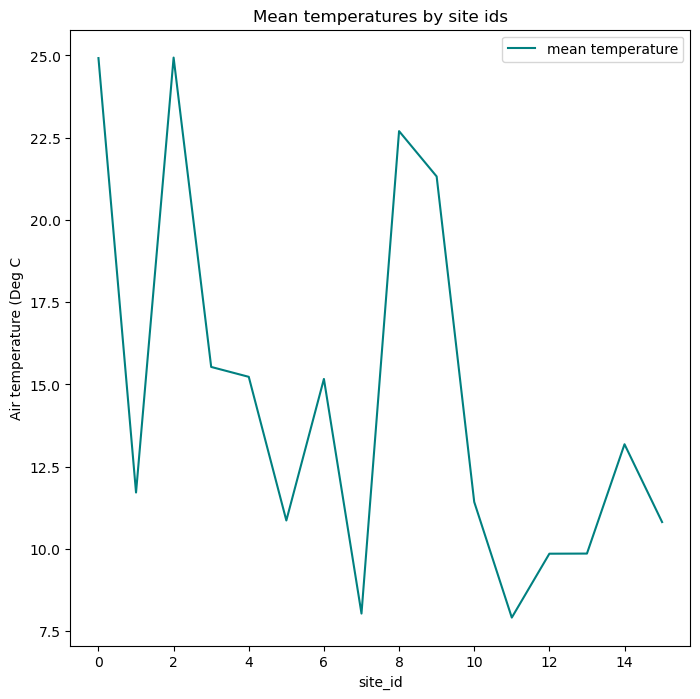

In [32]:
plt.figure(figsize=(8,8))
temp_df= train.groupby('site_id').air_temperature.mean().reset_index()
sns.lineplot(x=temp_df['site_id'], y=temp_df['air_temperature'], color='teal',label='mean temperature')
plt.ylabel("Air temperature (Deg C")
plt.title("Mean temperatures by site ids")
plt.show()

There is huge variation in temperatures of various sites. It seems that some sights lie in the northern parts and some in southern parts.

# Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

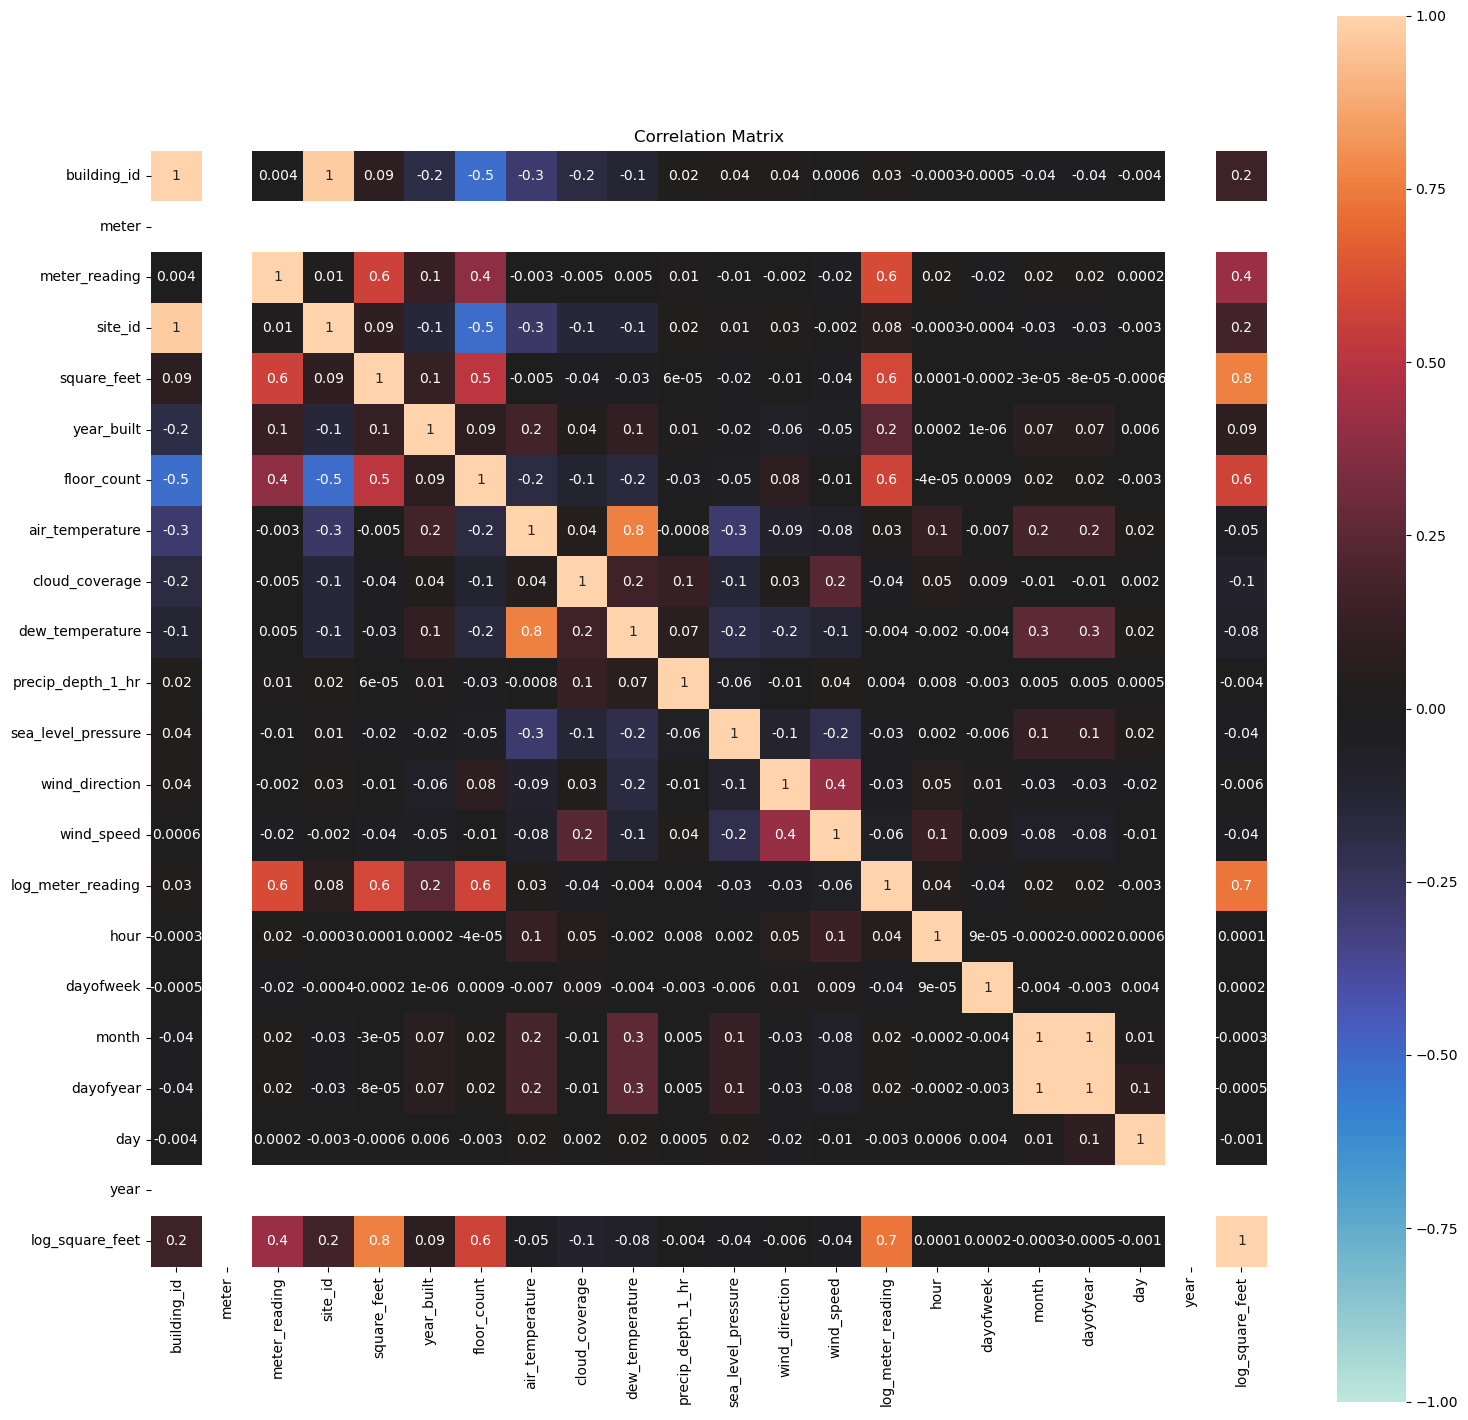

In [33]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr( numeric_only=True), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, square=True)
plt.title('Correlation Matrix')

We have plotted the correlation matrix of the features available. The square feet and floor count features have a strong positive correlation with the target variable. As we know size of the building is a huge factor on how much energy its is consuming. Year built is also having a slight positive correlation.